# Baseline implementation
This notebook implement the prediction of hypotension using the last mean artrial pressure (MAP) value. It is use as a baseline to compare with other models.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from scripts.dataLoader import dataLoader

In [16]:
HALF_TIME_FILTERING = 10 # secondes

In [17]:
# test if raw file exists
if not os.path.exists('data/data_async.csv'):
    print('data_async.csv does not exist, please run dataset_download.py first')
    exit()
    
if not os.path.exists('data/data_baseline.csv'):
    dataframe = dataLoader(
        half_times= [10],
    )
    dataframe.to_csv('data/data_baseline.csv', index=False)
else:
    dataframe = pd.read_csv('data/data_baseline.csv')


0
---
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      3639
         1.0       0.00      0.00      0.00       133

    accuracy                           0.96      3772
   macro avg       0.48      0.50      0.49      3772
weighted avg       0.93      0.96      0.95      3772

[[3639    0]
 [ 133    0]]
1
---
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4003
         1.0       0.00      0.00      0.00       160

    accuracy                           0.96      4163
   macro avg       0.48      0.50      0.49      4163
weighted avg       0.92      0.96      0.94      4163

[[4003    0]
 [ 160    0]]
2
---
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      2763
         1.0       0.00      0.00      0.00       152

    accuracy                           0.95      2915
   macro avg       0.47      0.50      0.49      2915
we

/home/aubouinb/ownCloud/Code/hypotension_pred/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aubouinb/ownCloud/Code/hypotension_pred/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aubouinb/ownCloud/Code/hypotension_pred/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

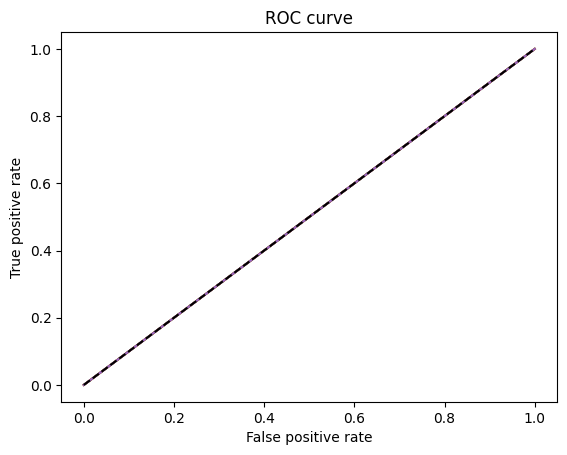

In [21]:
# for each subgoup of data, create a regressor and evaluate it
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve

tpr, fpr, auc  = [], [], []

for cv, test in dataframe.groupby('cv_group'):
    # create a regressor
    print(cv)
    print('---')

    train = dataframe[dataframe['cv_group'] != cv]
    train = train.dropna(subset=[f'mbp_ema_{HALF_TIME_FILTERING}'])
    test = test.dropna(subset=[f'mbp_ema_{HALF_TIME_FILTERING}'])
    x_train = train[f'mbp_ema_{HALF_TIME_FILTERING}'].values.reshape(-1, 1)
    y_train = train['label'].values
    # evaluate it
    model = RidgeClassifier()
    model.fit(x_train, y_train)

    x_test = test[f'mbp_ema_{HALF_TIME_FILTERING}'].values.reshape(-1, 1)
    y_test = test['label'].values
    y_pred = model.predict(x_test)

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    fpr_, tpr_, _ = roc_curve(y_test, y_pred)
    tpr.append(tpr_)
    fpr.append(fpr_)

    auc.append(roc_auc_score(y_test, y_pred))

# plot the ROC curve
plt.figure()
for i in range(len(tpr)):
    plt.plot(fpr[i], tpr[i], label=f'cv {i} (AUC = {auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

print(f'AUC: {sum(auc)/len(auc):.2f} +/- {pd.Series(auc).std():.2f}')

   fpr
0    0
